# <center> <font color=blue>Black Friday: How much will a customer spend  </font> </center>
## This is my approach on Analytics a Black Friday sell. Here is a complete step-by-step analysis on the issue 

In [1]:

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def plot(group,column,plot):
    ax=plt.figure(figsize=(12,6))
    df.groupby(group)[column].sum().sort_values(ascending=False).plot(plot)
    
    
def MSE (y, y_hat):
    return (OLS(y,y_hat)/len(y))


def OLS(y,y_hat):
    return (y - y_hat).dot(y - y_hat)
def R2 (y, y_hat):
    return 1 - OLS(y, y_hat) / OLS(y,y.mean())

def OLS_L2(y,y_hat,l2,w):
    return (y - y_hat).dot(y - y_hat) + l2*w.T.dot(w)

def Diff(t, r): 
    l = 0
    for i in range (len(t)):
        l += (1 - abs(t[i] - r[i])/r[i])
        
    return l / len(t)

def L2(X,y,eta):
    
    w = np.random.randn(X.shape[1])
    
    J=[]
    #eta = 1e-3
    epochs = 50
    l2 = 50 
    for i in range (epochs):
        y_hat = X.dot(w)
        J.append(OLS_L2(y,y_hat,l2,w))
        w -= eta*(X.T.dot(y_hat - y) + l2*w)
    
    return J

def GD(X,y,eta):
    
    w = np.random.randn(X.shape[1])
    J = []
    epochs = 50

    for i in range(epochs):
        y_hat = X.dot(w)
        J.append(OLS(y,y_hat))
        w -= eta*X.T.dot(y_hat - y)
    
    return J

def L1(X,y,eta):
    
    w_l1 = np.random.randn(X.shape[1])

    J = []
    l = 50
    epochs = 50

    for i in range (epochs):
        y_hat = X.dot(w_l1)
        J.append(OLS(y,y_hat) + l*np.sum(np.abs(w_l1)))
        w_l1 -= eta*(X.T.dot(y_hat - y)  + l*np.sign(w_l1))

    return J

def el(X,y,eta):
    w = np.random.randn(X.shape[1])   
    J=[]
    epochs = 50
    l = 100 
    l2 = 100
    for i in range (epochs):
        y_hat = X.dot(w)
        J.append(OLS_L2(y,y_hat,l2,w) + l*np.sum(np.abs(w)))
        w -= eta*(X.T.dot(y_hat - y) + l2*w + l*np.sign(w))
    
    return J

def J_Va (X,y,X2,y2,l,l2):
    J_T=[]
    J_V=[]
    J_V_com = []
    eta = 2e-7
    epochs = 100
    for i in l:
        for j in l2:
            w=fit_gradient_d(X,y,i,j,epochs,eta)
            y_hat_train=X.dot(w)
            y_hat_valid=X2.dot(w)
            J_T.append(OLS_L2(y,y_hat_train,j,w) + i*np.sum(np.abs(w)))
            J_V.append(OLS_L2(y2,y_hat_valid,j,w) + i*np.sum(np.abs(w)))
            J_V_com.append([i,j])
    
    return J_T, J_V , J_V_com
            
def fit_gradient_d(X,y,i,j,epochs,eta):
    w = np.random.randn(X.shape[1])   
    for k in range (epochs):
                y_hat = X.dot(w)
                w -= eta*(X.T.dot(y_hat - y) + j*w + i*np.sign(w))
            
    
    return w 
    

def Model(df):
    Train = int(df.shape[0] * 0.6)
    Validate = int(df.shape[0] * 0.2)
    Test = int(df.shape[0] - Train - Validate)

    Train_Model =  df[:Train:]
    Validate_Model = df[Train:Validate + Train:]
    Test_Model = df[Validate + Train::]
    
    
    D_Train = pd.get_dummies(Train_Model)
    D_Train.drop("Purchase",axis='columns',inplace=True)

    y1 = Train_Model.Purchase
    x1 = D_Train
    
    x1 = (x1 - x1.min()) / (x1.max() - x1.min())
    X1 = np.vstack([np.array([1]*(x1.shape[0])), x1.T]).T
    
    Id1 = np.identity(X1.shape[1])
    Id2 = np.identity(X1.shape[1])
    Id1[0,0] = 0

    D_Validate = pd.get_dummies(Validate_Model)
    D_Validate.drop("Purchase",axis='columns',inplace=True)

    y2 = Validate_Model.Purchase
    x2 = D_Validate

    x2 = (x2 - x2.min()) / (x2.max() - x2.min())
    X2 = np.vstack([np.array([1]*(x2.shape[0])), x2.T]).T


    D_Test = pd.get_dummies(Test_Model)
    D_Test.drop("Purchase",axis='columns',inplace=True)

    y3 = Test_Model.Purchase
    x3 = D_Test

    x3 = (x3 - x3.min()) / (x3.max() - x3.min())
    X3 = np.vstack([np.array([1]*(x3.shape[0])), x3.T]).T
    

 #---------------L2------------- 
    plt.figure(1)
    plt.plot(L2(X1,y1,2e-7))
    plt.title('Ridge Regression')
    

#---------------Gradient Decent Model------------- 
    plt.figure(2) 
    plt.plot(GD(X1,y1,2e-7) ,color = 'red' )
    plt.title('Without Regularization')
    #plt.show()
    
    plt.figure(3) 
#---------------L1------------- 
    plt.figure(3) 
    plt.plot(L1(X1,y1,2e-7))
    plt.title('LASSO')

#------------elastic net regression ----------
    plt.figure(4) 
    plt.plot(el(X1,y1,2e-7) ,color = 'red')
    plt.title('elastic net regression with l1 = 50, l2=50')
    

#------------Valadation ----------
    l = np.arange(0,100,10)
    l2 = np.arange(0,100,10)
    #l = [0,1,50]
    #l2 = [0,1,50]
    Val = J_Va(X1,y1,X2,y2,l,l2)
    
    plt.figure(5)
    plt.plot(Val[0])
    plt.title('Train')
    
    plt.figure(6)
    plt.plot(Val[1])
    plt.title('Valid')

    V2min = min(Val[1])
    ls = Val[2][Val[1].index(V2min)]
    #print(Val[1]) J_V list
    #print(V2min) min in J_V lst
    #print(Val[2]) lambda combinition 
    print ("Best lambda1 and lambda2 is {} ".format(ls))
    
    best_W = fit_gradient_d(X1,y1,ls[0],ls[1],100,2e-7)
    #print ("Best W after training is {} ".format(best_W))
    
    y_hat_test = X3.dot(best_W) 
    
    print ("Acc on test with elastic net regression is {} ".format(Diff(y_hat_test, list(y3))))
    print ("R-Squared with elastic net regression {}".format(R2(y3,y_hat_test)))
    
    
    best_W2 = fit_gradient_d(X1,y1,0,1,100,2e-7)
    #print ("Best W after training is {} ".format(best_W))
    
    y_hat_test2 = X3.dot(best_W2) 
    
    print ("Acc on test with l1=0,l2=1 is {} ".format(Diff(y_hat_test2, list(y3))))
    print ("R-Squared with elastic net regression {}".format(R2(y3,y_hat_test2)))
   

    best_W3 = fit_gradient_d(X1,y1,1,0,100,2e-7)
    #print ("Best W after training is {} ".format(best_W))
    
    y_hat_test3 = X3.dot(best_W3) 
    
    print ("Acc on test with l1=1,l2=0 is {} ".format(Diff(y_hat_test3, list(y3))))
    print ("R-Squared with elastic net regression {}".format(R2(y3,y_hat_test3)))
    
    best_W4 = fit_gradient_d(X1,y1,50,50,100,2e-7)
    #print ("Best W after training is {} ".format(best_W))
    
    y_hat_test4 = X3.dot(best_W4) 
    
    print ("Acc on test with l1=50,l2=50 is {} ".format(Diff(y_hat_test4, list(y3))))
    print ("R-Squared with elastic net regression {}".format(R2(y3,y_hat_test4)))
   

## <center> <font color=blue>Hypotheses </font> </center>
##### <center>City Level Hypotheses: </center>
<center> City Type and Size /
Population Density /
Younger Population </center>

##### <center>Customer Level Hypotheses:
<center>Income /
Age and Gender /
Family Size /
Purchase History </center>

##### <center>Product Level Hypotheses: </center>
<center> Category / 
Price /
Advertising  /
Visibility  /
Brand  </center>

In [226]:
# @hidden_cell
df = pd.read_csv("./Project2Data/BlackFriday.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


#### <center>Information about the given data set</center>
                                
    
                                Data columns (total 12 columns):

                                User_ID                       537577 non-null int64
                                Product_ID                    537577 non-null object
                                Gender                        537577 non-null object
                                Age                           537577 non-null object
                                Occupation                    537577 non-null int64
                                City_Category                 537577 non-null object
                                Stay_In_Current_City_Years    537577 non-null object
                                Marital_Status                537577 non-null int64
                                Product_Category_1            537577 non-null int64
                                Product_Category_2            370591 non-null float64
                                Product_Category_3            164278 non-null float64
                                Purchase                      537577 non-null int64

<center>537,577 enteries and 12 categories</center>


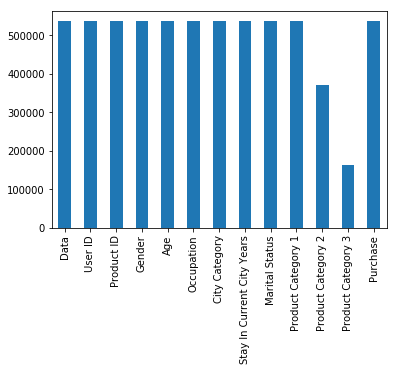

In [227]:
#@hidden_cell
Data = ["Data","User ID" ,"Product ID"  ,"Gender" ,"Age" ,"Occupation","City Category" , "Stay In Current City Years","Marital Status" ,"Product Category 1" ,"Product Category 2" ,"Product Category 3" ,"Purchase" ]
Size = [537577,537577,537577,537577,537577,537577,537577,537577,537577,537577,370591,164278,537577]

Tempdf = pd.DataFrame({'Data': Size}, index = Data)
ax = Tempdf.plot.bar(legend=False)

### <center>This is a table of all categories</center>
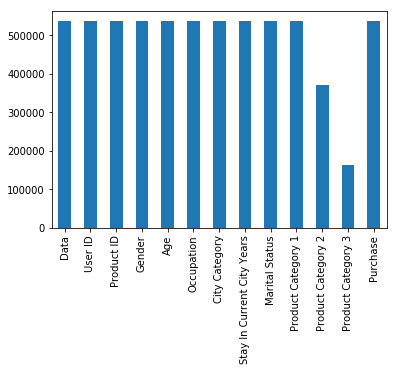



### <center>Data (total 13): </center>
    Data                      Number of Item
    User_ID                       537577 
    Product_ID                    537577 
    Gender                        537577 
    Age                           537577 
    Occupation                    537577 
    City_Category                 537577 
    Stay_In_Current_City_Years    537577 
    Marital_Status                537577 
    Product_Category_1            537577 
    Product_Category_2            370591 
    Product_Category_3            164278 
    Purchase                      537577 
## It is my belief that Gender, Age , City Category , Product Category are the predictors that will influence more the amount spent by a customer on this day

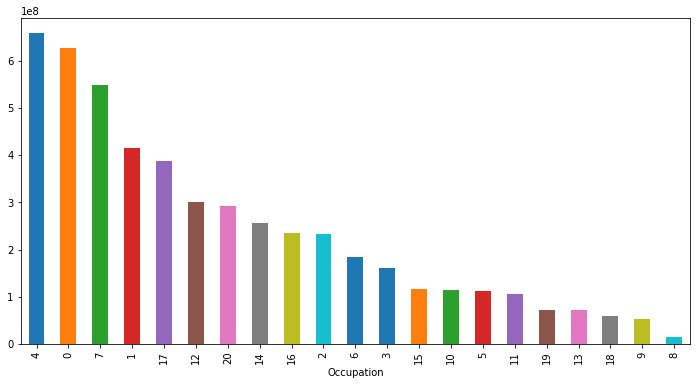

In [228]:
plot('Occupation','Purchase', 'bar')

## <center>Occupation / Purchase </center>
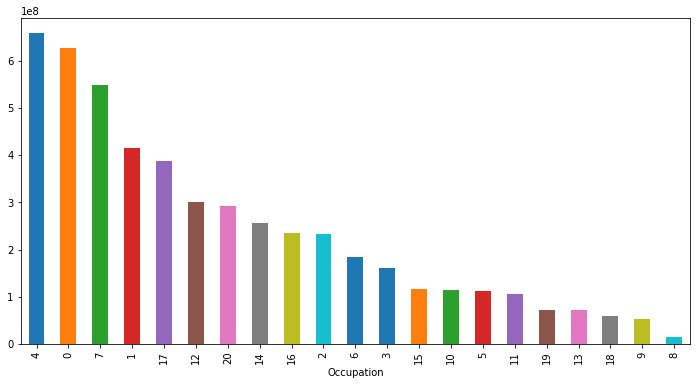

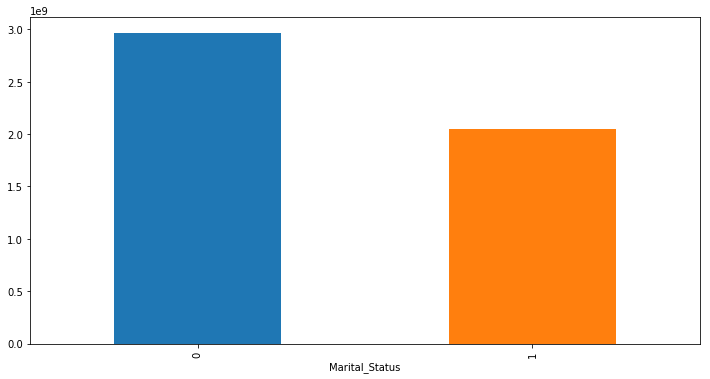

In [229]:
plot('Marital_Status','Purchase', 'bar')

## <center>Marital / Purchase</center>
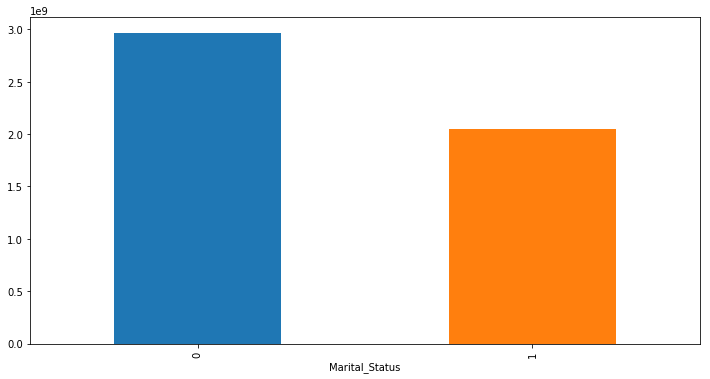

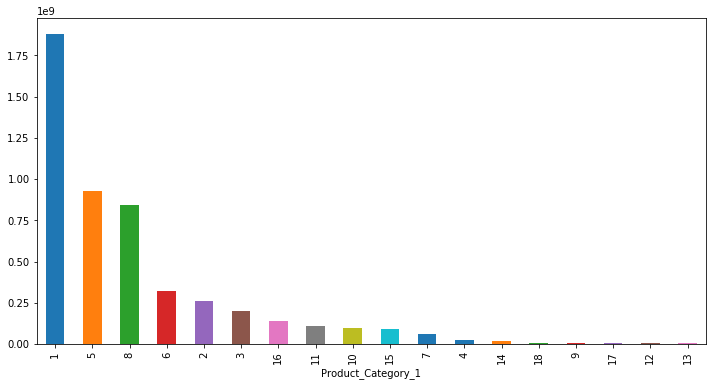

In [230]:
plot('Product_Category_1','Purchase', 'bar')

## <center>Product Category 1 / Purchase</center>
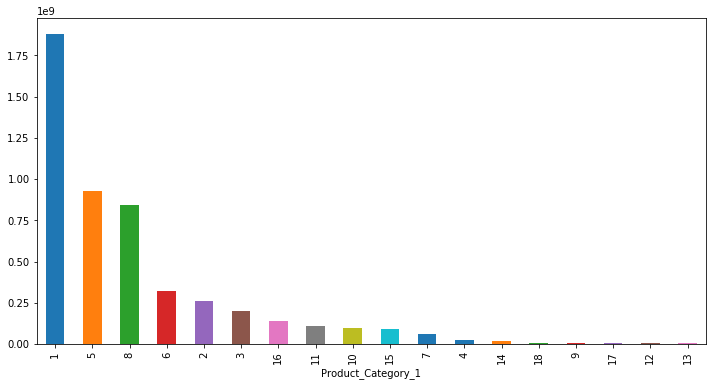

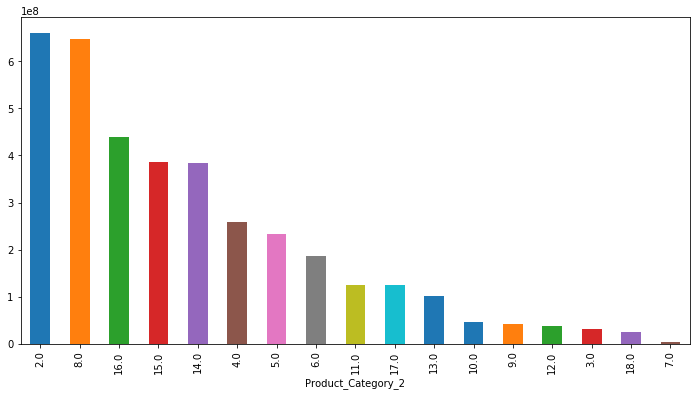

In [231]:
plot('Product_Category_2','Purchase', 'bar')

## <center>Product Category 2 / Purchase</center>
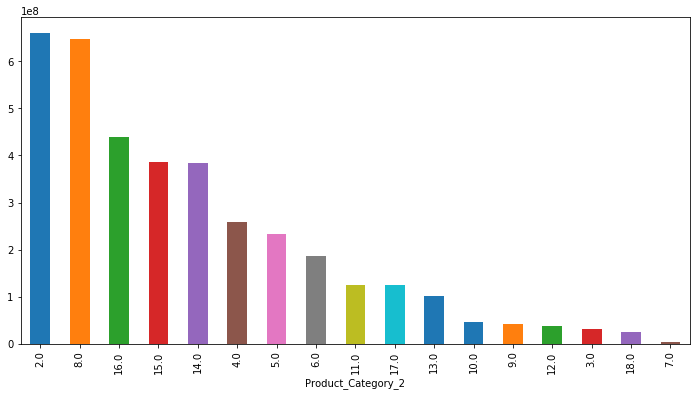

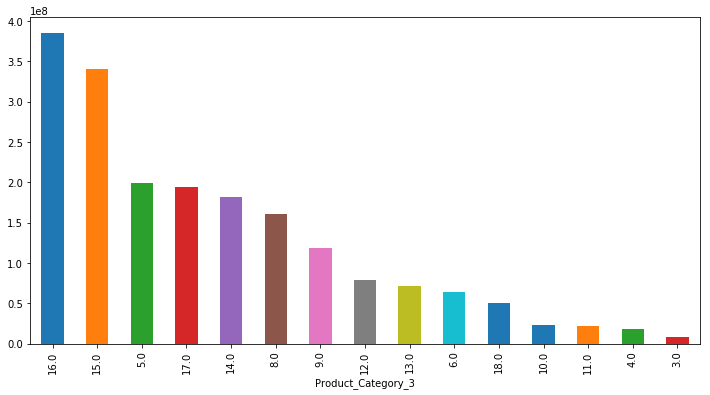

In [232]:
plot('Product_Category_3','Purchase', 'bar')

## <center>Product Category 3 / Purchase</center>

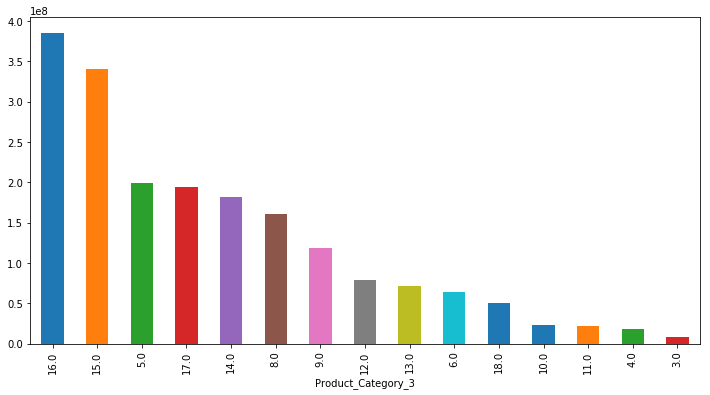

In [233]:
numeric_features = df.select_dtypes(include=[np.number])
#numeric_features.dtypes
corr = numeric_features.corr()
print (corr["Purchase"].sort_values(ascending=False)[:10], '\n')
print (corr['Purchase'].sort_values(ascending=False)[-10:])

Purchase              1.000000
Occupation            0.021104
User_ID               0.005389
Marital_Status        0.000129
Product_Category_3   -0.022257
Product_Category_2   -0.209973
Product_Category_1   -0.314125
Name: Purchase, dtype: float64 

Purchase              1.000000
Occupation            0.021104
User_ID               0.005389
Marital_Status        0.000129
Product_Category_3   -0.022257
Product_Category_2   -0.209973
Product_Category_1   -0.314125
Name: Purchase, dtype: float64


## <center>Correlation between all numeric features</center>
                              Purchase              1.000000
                              Occupation            0.021104
                              User_ID               0.005389
                              Marital_Status        0.000129
                              Product_Category_3   -0.022257
                              Product_Category_2   -0.209973
                              Product_Category_1   -0.314125
----------------------------------------------------------------------------------------------------------
                              Purchase              1.000000
                              Occupation            0.021104
                              User_ID               0.005389
                              Marital_Status        0.000129
                              Product_Category_3   -0.022257
                              Product_Category_2   -0.209973
                              Product_Category_1   -0.314125
                                      

In [234]:
corr.style.background_gradient()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1,-0.0230241,0.0187318,0.00368704,0.00147093,0.00404481,0.00538947
Occupation,-0.0230241,1,0.0246909,-0.0081144,-3.08405e-05,0.0134517,0.0211043
Marital_Status,0.0187318,0.0246909,1,0.0205459,0.0151163,0.0194525,0.000129018
Product_Category_1,0.00368704,-0.0081144,0.0205459,1,0.540423,0.22949,-0.314125
Product_Category_2,0.00147093,-3.08405e-05,0.0151163,0.540423,1,0.543544,-0.209973
Product_Category_3,0.00404481,0.0134517,0.0194525,0.22949,0.543544,1,-0.0222566
Purchase,0.00538947,0.0211043,0.000129018,-0.314125,-0.209973,-0.0222566,1


# There seems to be no multicollinearity with our predictors which is a good thing, although there is some correlation among the product categories. 

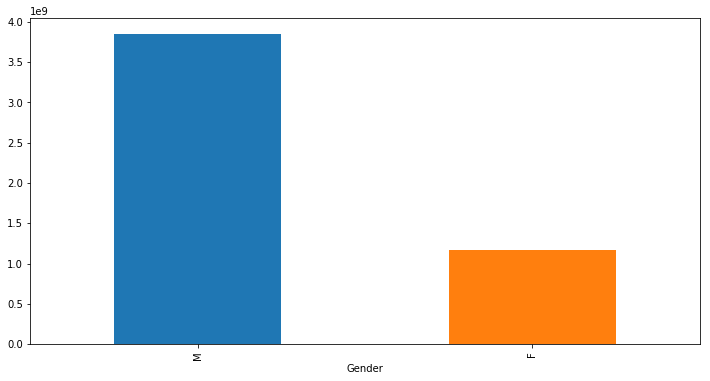

In [235]:
plot('Gender','Purchase', 'bar')

## <center>Gender / Purchase</center>
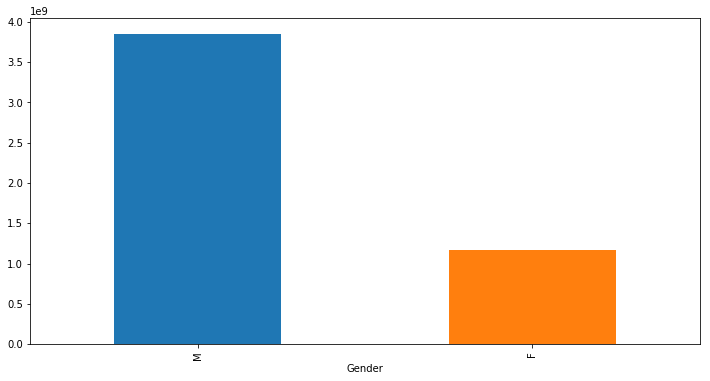

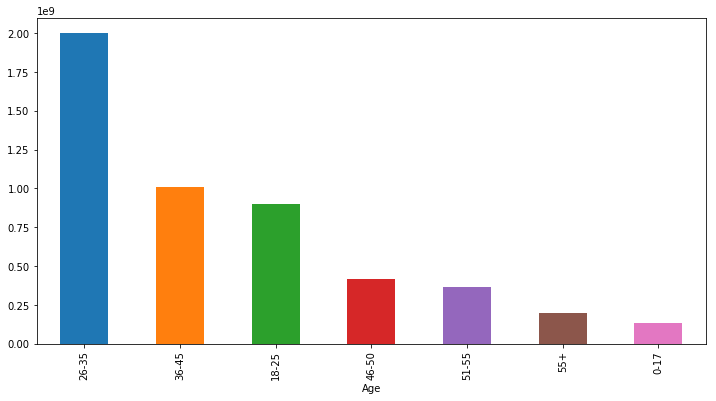

In [236]:
plot('Age','Purchase', 'bar')

## <center>Age / Purchase</center>
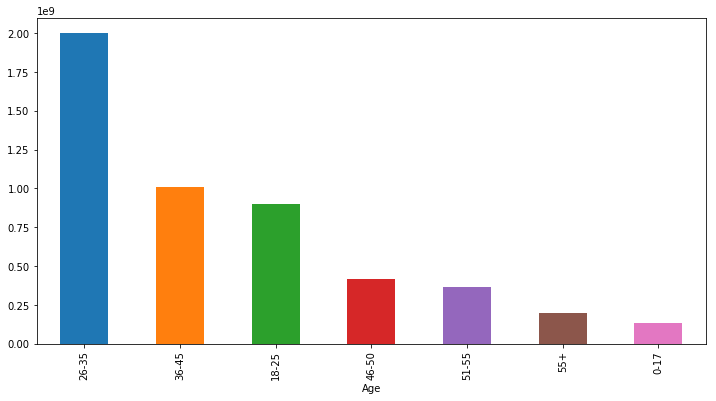

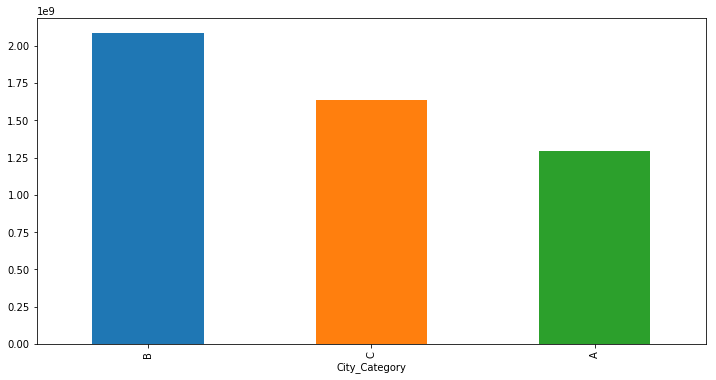

In [237]:
plot('City_Category','Purchase', 'bar')

## <center> City Category / Purchase</center>
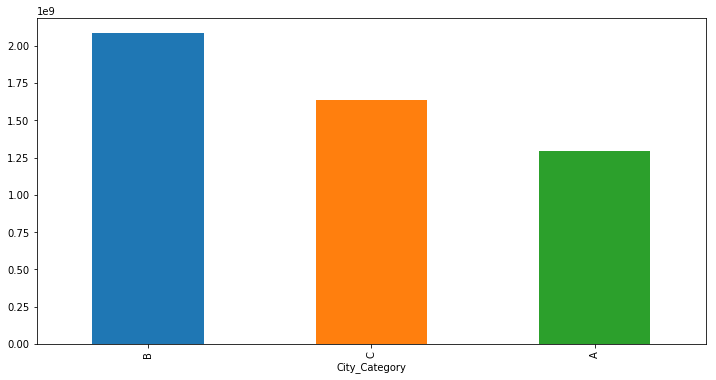

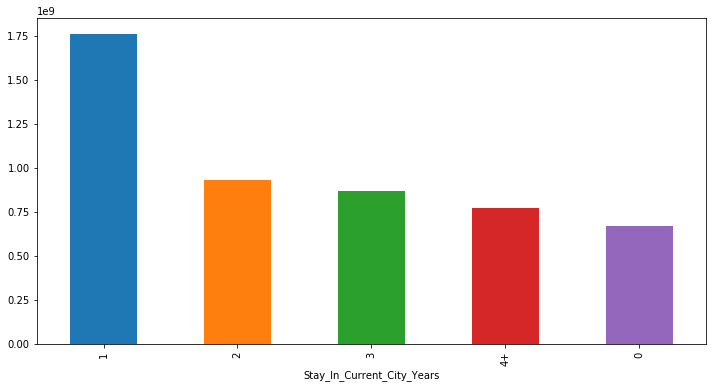

In [ ]:
plot('Stay_In_Current_City_Years','Purchase', 'bar')

## <center>Year staied in the current city / Purchase</center>
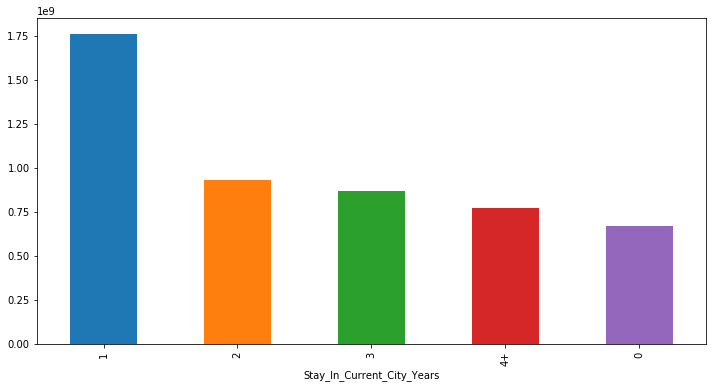

Age : should be treated as numerical. It presents age groups.

City_Category: We can convert this to numerical as well, with dummy variables. Should take a look at the frequency of the values.

Occupation : There are 21 occupations, presents as groups.

Gender: There are possibly two gender, we can make this binary.

Product_ID: Should see if the string “P” means something and if there are other values.

Stay_In_Current_City_Years: We should deal with the ‘+’ symbol.

Product_Category_2 and Product_Category_3 : Have NaN values.

In [ ]:
#Check null values per variable
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

## <center>Checking for empty values in the data set</center>
                                        User_ID                            0
                                        Product_ID                         0
                                        Gender                             0
                                        Age                                0
                                        Occupation                         0
                                        City_Category                      0
                                        Stay_In_Current_City_Years         0
                                        Marital_Status                     0
                                        Product_Category_1                 0
                                        Product_Category_2            166986
                                        Product_Category_3            373299
                                        Purchase                           0

In [ ]:
# We are goona replace NA with 0s
df.fillna(0.0,inplace = True)
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [ ]:
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               18
Product_Category_3               16
Purchase                      17959
dtype: int64

## <center>Checking for unique values</center>
                                    User_ID                        5891
                                    Product_ID                     3623
                                    Gender                            2
                                    Age                               7
                                    Occupation                       21
                                    City_Category                     3
                                    Stay_In_Current_City_Years        5
                                    Marital_Status                    2
                                    Product_Category_1               18
                                    Product_Category_2               18
                                    Product_Category_3               16
                                    Purchase                      17959

### <center>Feature Engineering </center>
### droping Product ID 
### User ID
### creating dummy value for Age, Gender,Marital_Status, City Category,Stay In Current City Years, Occupation and Product Category 1,2,3


In [ ]:
df = df.sample(frac=1)

In [ ]:
Train = int(df.shape[0] * 0.6)
Validate = int(df.shape[0] * 0.2)
Test = int(df.shape[0] - Train - Validate)

Train_Model =  df[:Train:]
Validate_Model = df[Train:Validate + Train:]
Test_Model = df[Validate + Train::]

In [ ]:
Train_Model.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
342976,1004783,P00034042,M,26-35,0,A,4+,0,1,2.0,16.0,7699
392196,1000346,P0094142,F,26-35,0,B,2,0,4,5.0,0.0,2808
289804,1002670,P00228642,M,36-45,6,B,1,0,5,18.0,0.0,3555
174538,1003017,P00134542,F,36-45,9,B,1,0,5,14.0,0.0,5428
392341,1000375,P00265242,M,26-35,2,B,1,0,5,8.0,0.0,8739


In [ ]:
Validate_Model.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
79817,1000293,P00053042,M,55+,1,C,1,1,5,14.0,16.0,1716
275986,1000549,P00317342,M,26-35,6,A,3,0,8,16.0,0.0,6115
407061,1002674,P00112842,M,26-35,4,A,1,0,8,17.0,0.0,7923
254032,1003224,P00120142,F,26-35,14,A,3,1,5,0.0,0.0,8880
84231,1001029,P00193142,M,26-35,0,B,0,0,5,0.0,0.0,3671


In [ ]:
Test_Model.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
149198,1005026,P0095942,M,26-35,17,B,1,1,3,4.0,0.0,10624
456441,1004254,P00110842,M,26-35,17,C,2,0,1,2.0,5.0,19675
273823,1000181,P00114442,M,18-25,17,C,1,0,5,6.0,0.0,6878
292096,1003048,P00334042,M,18-25,2,C,3,1,1,11.0,15.0,19063
22142,1003483,P00117142,F,46-50,7,B,0,1,2,17.0,0.0,12974


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,6.784907,3.871773,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,6.211618,6.265963,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,0.000000,0.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,0.000000,0.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,5.000000,0.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,14.000000,8.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [ ]:
df = pd.read_csv("./Project2Data/BlackFriday.csv")
df.drop(['User_ID', 'Product_ID'], axis=1, inplace = True)
columns_to_1hot = ['Gender','City_Category','Age','Occupation','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']
df = pd.get_dummies(df, columns=columns_to_1hot)
df = df.sample(frac=1)
Model(df)   

KeyboardInterrupt: 

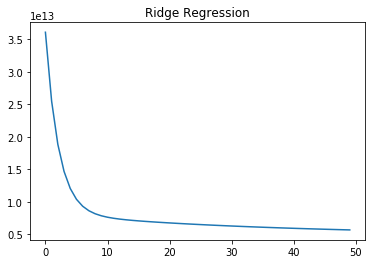

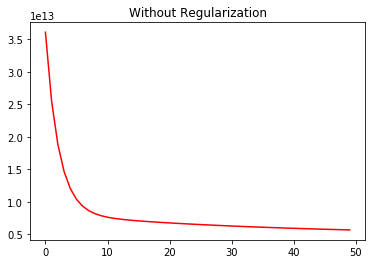

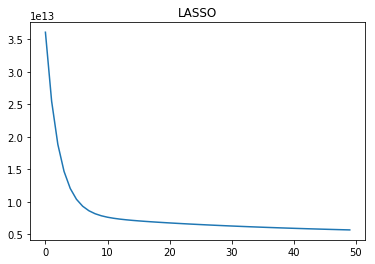

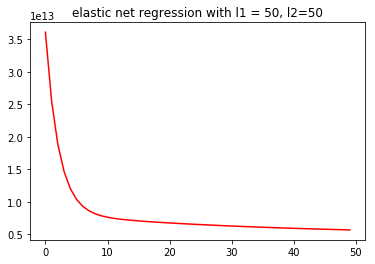

In [12]:
df = pd.read_csv("./Project2Data/BlackFriday.csv")
df.drop(['User_ID', 'Product_ID','Product_Category_2','Product_Category_3'], axis=1, inplace = True)
columns_to_1hot = ['Gender','City_Category','Age','Occupation','Marital_Status','Product_Category_1']
df = pd.get_dummies(df, columns=columns_to_1hot)
df = df.sample(frac=1)
Model(df)  

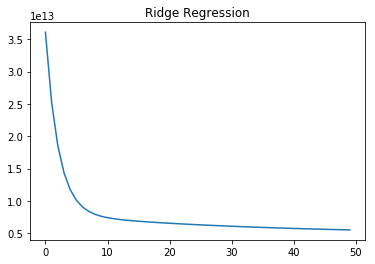

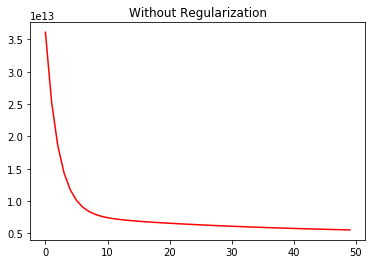

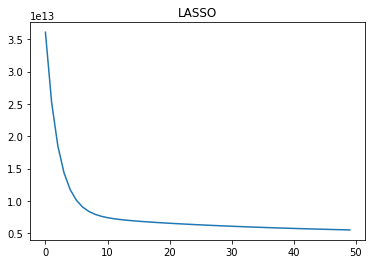

### The R^2 is 0.27159455043187934  with a %31.79 accuracy on the test data. 
### The next step will be looking at doing more Hyperparameter Tuning and Ensembling to further improver my model

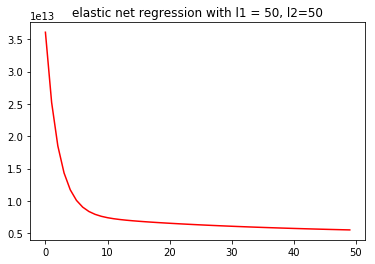

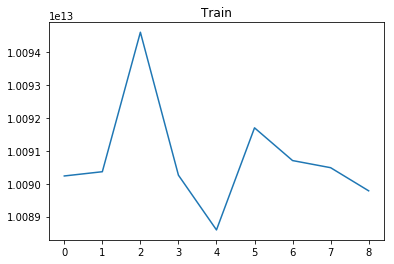

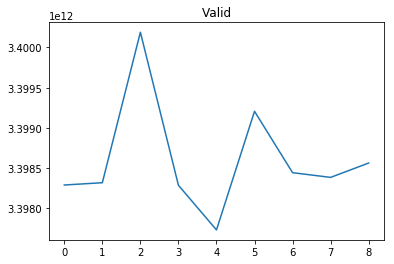

## <center>The last two graphs are so noisy is because the testing range for l1, l2 and the epochs are not large enough</center>

## This is after increass the range of Lambda1 and Lambda2

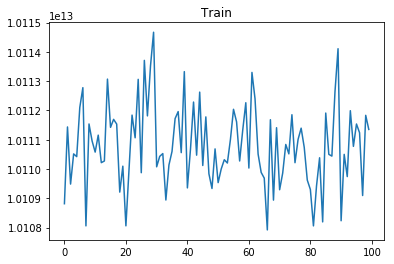
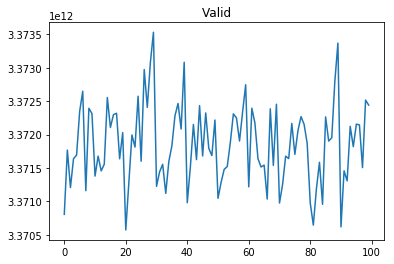

# <center> Conclusion </center>
### The R2 = 0.31159455043187934  with a %33.79 accuracy on the test data. 
### The next step will be looking at doing more Hyperparameter Tuning and Ensembling to further improver my model

5000000000000.0